In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jueaPce6QMXYkjbx6RYyF1PoEmTqYPIEx5Obm7mc_HF9',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fuelconsumptionpredict-donotdelete-pr-ynmi9bkuwqjdf5'
object_key = 'measurements.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


Cleaning The data

In [5]:
dropped_data = data.drop(['refill liters','refill gas','specials'],axis = 1)

In [6]:
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [60]:
dropped_data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


Looking at the data it has been observed that columns or parameters have values with commas in it. These are required to be replaced by dots

In [7]:
def delete_comma_and_convert_float(df,column_name):
    
    index = df.columns.get_loc(column_name)
    
    for i in range(len(df[column_name])):
        value = df.iloc[i,index]
        value_list = value.split(',')
        
        if len(value_list) == 2:
            new_value = float(''.join(value_list)) / 10
            df.iloc[i,index] = new_value
            
        else :
            df.iloc[i,index] = float (value)

In [8]:
dropped_data['distance'] = dropped_data['distance'].astype(str)
delete_comma_and_convert_float(dropped_data, 'distance')
dropped_data['distance'] = dropped_data['distance'].astype(float)
dropped_data['consume'] = dropped_data['consume'].astype(str)
delete_comma_and_convert_float(dropped_data, 'consume')
dropped_data['consume'] = dropped_data['consume'].astype(float)

In [9]:
dropped_data['gas_type'] = dropped_data['gas_type'].map({'SP98': 1, 'E10': 0})

# change 'gas_type' values to 1 and 0. String to int

Getting the data ready

In [10]:
new_df = dropped_data[['distance','speed','temp_outside','gas_type','rain','sun','consume']]
sorted_df = new_df = new_df.sort_values('consume')
dataset_x = sorted_df.drop(['consume'],axis=1)
dataset_y = sorted_df.consume.values

Spotting any correlation between the parameters

<AxesSubplot:>

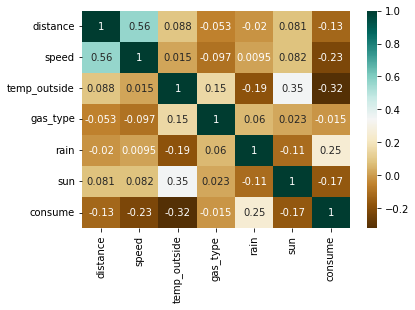

In [11]:
sns.heatmap(new_df.corr(),cmap = 'BrBG', annot=True)

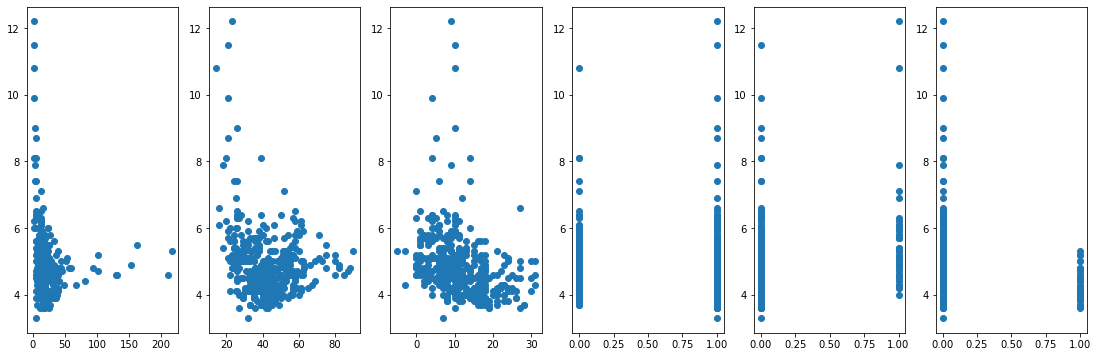

In [12]:
plt.figure(figsize=(19,6))

plt.subplot(161)
plt.scatter(dataset_x['distance'],dataset_y)
plt.subplot(162)
plt.scatter(dataset_x['speed'],dataset_y)
plt.subplot(163)
plt.scatter(dataset_x['temp_outside'],dataset_y)
plt.subplot(164)
plt.scatter(dataset_x['gas_type'],dataset_y)
plt.subplot(165)
plt.scatter(dataset_x['rain'],dataset_y)
plt.subplot(166)
plt.scatter(dataset_x['sun'],dataset_y)


plt.show()

Creating the data model

Splitting the data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size= 0.2, random_state= 42)

In [14]:
x_train.shape

(310, 6)

In [15]:
x_test.shape

(78, 6)

In [16]:
y_train.shape

(310,)

In [17]:
y_test.shape

(78,)

Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
Model = LinearRegression()

In [20]:
Model.fit(x_train,y_train)

LinearRegression()

In [21]:
#To retrieve the intercept:
print(Model.intercept_)

#For retrieving the slope:
print(Model.coef_)

6.058784482574678
[ 0.00159648 -0.01888714 -0.03477756 -0.04095511  0.66091993 -0.20902697]


*Predicting Values for Train datset*

In [22]:
y_pred = Model.predict(x_test)

In [23]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,5.1,5.975973
1,4.0,4.191514
2,4.6,4.514403
3,4.0,4.615925
4,5.9,5.987960
...,...,...
73,3.6,4.570452
74,3.8,4.738348
75,4.3,4.378353
76,4.3,5.635282


*The graph shows the actual values and the predicted values*

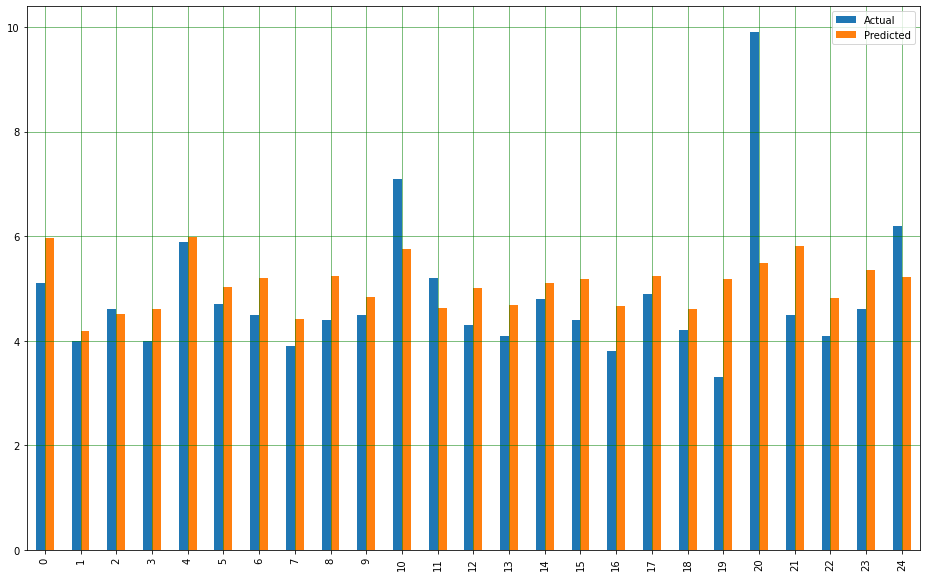

In [24]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Evaluation of the Model

In [25]:
from sklearn import metrics


In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7309626842679302
Mean Squared Error: 1.2565262554606385
Root Mean Squared Error: 1.1209488192868746


IBM DEPLOYMENT

In [4]:
%pip install  -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [29]:
from ibm_watson_machine_learning import APIClient
import json


## Authenticate and set space


In [30]:
wml_credentials = {
	"apikey":"l1fzrxmeL6hj7RAtabNLi7eiu0d83k8cthPzcjr21q52",
	"url":"https://us-south.ml.cloud.ibm.com"
}


In [32]:
wml_client = APIClient(wml_credentials)


In [36]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------------------------  ------------------------
ID                                    NAME                                 CREATED
5193e7e0-5829-4820-88db-85c86a30e655  Fuel Consumption Predict deployment  2022-11-11T09:25:25.719Z
------------------------------------  -----------------------------------  ------------------------


In [38]:
SPACE_ID="5193e7e0-5829-4820-88db-85c86a30e655"

In [39]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [76]:
wml_client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [77]:
import sklearn
sklearn.__version__

'1.0.2'

In [79]:
MODEL_NAME = 'fuelConsumptionPredict'
DEPLOYMENT_NAME = 'Fuel Consumption Predict deployment'
DEMO_MODEL = Model

In [80]:
#set python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [86]:
#setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid   
}

In [88]:
#save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data = x_train,
    training_target=y_train
)

In [89]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'distance', 'type': 'float64'},
      {'name': 'speed', 'type': 'int64'},
      {'name': 'temp_outside', 'type': 'int64'},
      {'name': 'gas_type', 'type': 'int64'},
      {'name': 'rain', 'type': 'int64'},
      {'name': 'sun', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-11T10:51:41.324Z',
  'id': 'fe377059-5743-4423-98d1-39667cfb9e55',
  'modified_at': '2022-11-11T10:51:43.689Z',
  'name': 'fuelConsumptionPredict',
  'owner': 'IBMid-666001SYRV',
  'resource_key': 'be6228bb-4499-4742-97c1-32ec2445191a',
  'space_id': '5193e7e0-5829-4820-88db-85c86a30e655'},
 'system': {'warnings': []}}

In [90]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'fe377059-5743-4423-98d1-39667cfb9e55'

In [95]:
#set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME: DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}


In [111]:
#deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
    )



#######################################################################################

Synchronous deployment creation for uid: 'fe377059-5743-4423-98d1-39667cfb9e55' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='50f7f5a7-b0e4-458f-9f9f-6eb5edb9936f'
------------------------------------------------------------------------------------------------


